## Demonstrating effect of bandpass with human freq

In [10]:
import plot_utils
import utils
import filter

%load_ext autoreload
%autoreload 2


(224, 224)


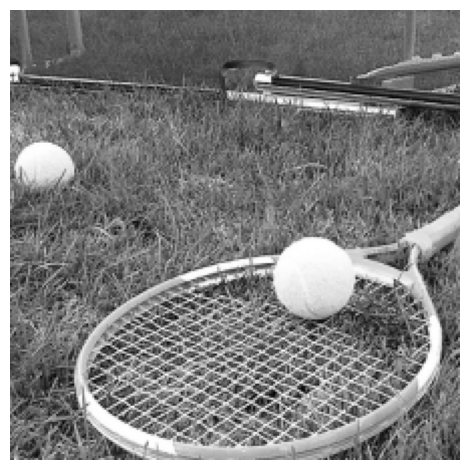

In [30]:
toy_img = utils.read_image('data/demo.JPEG', gray=True, to_float=True)
print(toy_img.shape)
plot_utils.im_show(toy_img)

(159,)


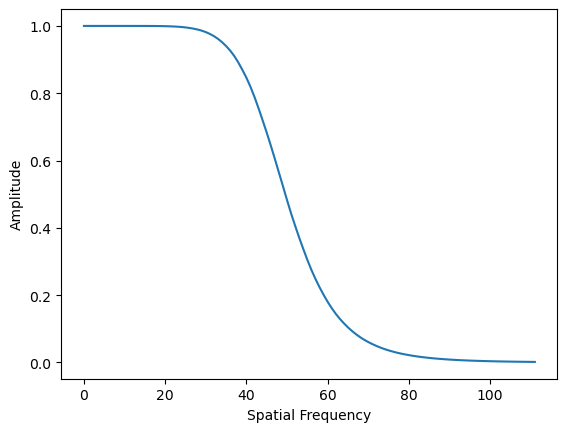

In [35]:
butterworth_lower = filter.butterworth_filter(toy_img.shape, cutoff=50, order = 4)
plot_utils.plot_freq_amplitude(butterworth_lower)

(159,)


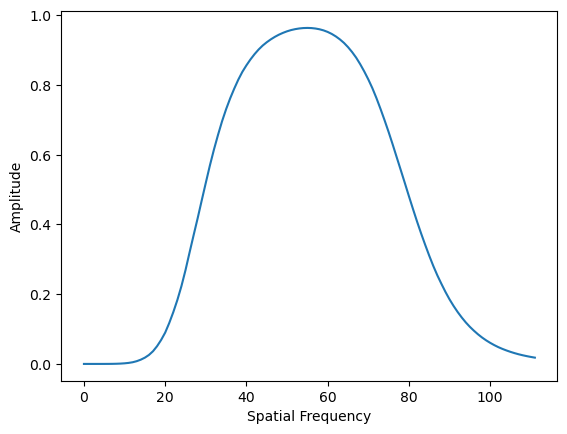

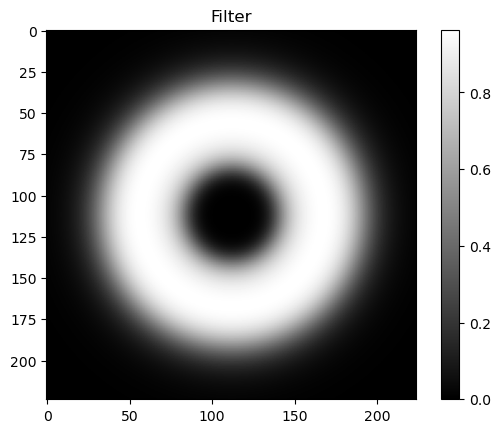

In [39]:
dob = filter.DoB_filter(toy_img.shape, cutoff_low=30, cutoff_high=80, order_low=3, order_high=6)
plot_utils.plot_freq_amplitude(dob)
plot_utils.plot_spectrum(dob)

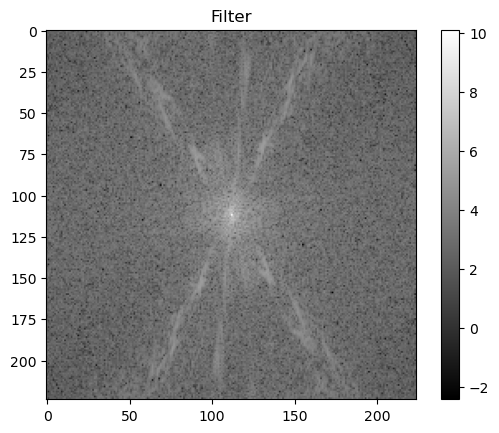

/Users/zhenanshao/Documents/git_repos/human-vis-freq-align/filter.py:95: RuntimeWarning: divide by zero encountered in log
  filtered_spectrum = np.log(np.abs(Fshift))


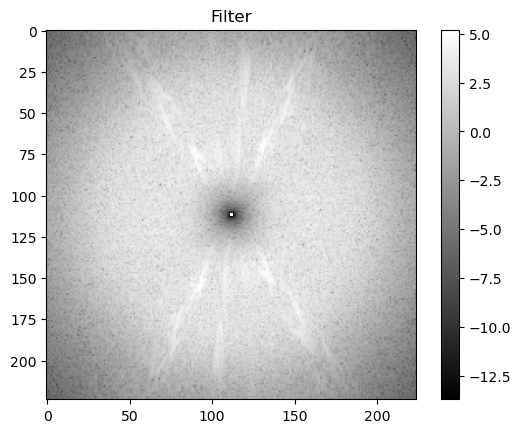

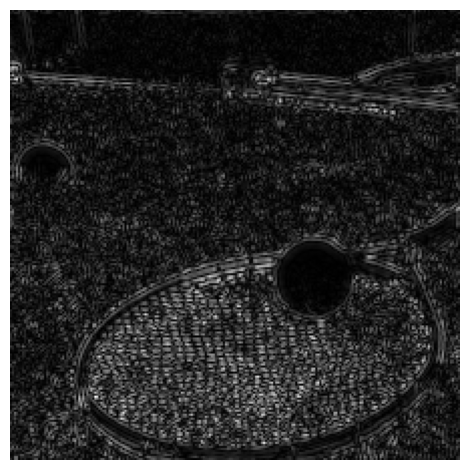

In [40]:
img_spectrum = filter.get_image_freq(toy_img)
plot_utils.plot_spectrum(img_spectrum)

dob_img, filtered_spectrum = filter.filter_image_infreq(toy_img, dob)
plot_utils.plot_spectrum(filtered_spectrum)
plot_utils.im_show(dob_img)
